# Code for plots

## Plot of the error by varying the input dimension

In [1]:
import numpy as np
from matplotlib import pyplot as plt


In [18]:
depth=5
W=512
input_dims=[5,10,20,40,100,784,30]
wd=1e-4

In [19]:
x_array=np.load(f'./arrays/sizes_{depth}_layer_{W}_inputdim_{input_dims[0]}.npy')
y_arrays=[]
for i in range(len(input_dims)):
    #y_arrays.append(np.load(f'./arrays/error_{depth}_layer_{W}_inputdim_{input_dims[i]}_wd_{wd}.npy'))
    y_arrays.append(np.load(f'./arrays/error_{depth}_layer_{W}_inputdim_{input_dims[i]}.npy'))
    

Text(0, 0.5, '$\\Delta error$')

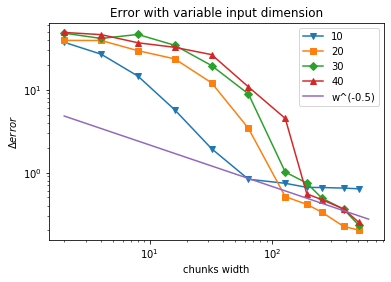

In [20]:
fig = plt.figure()
ax = plt.gca()
#ax.plot(x_array,y_arrays[0],marker="o",label="5")
ax.plot(x_array,y_arrays[1],marker="v",label="10")
ax.plot(x_array,y_arrays[2],marker="s",label="20")
ax.plot(x_array,y_arrays[6],marker="D",label="30")
ax.plot(x_array,y_arrays[3],marker="^",label="40")
#ax.plot(x_array,y_arrays[4],marker="p",label="100")
#ax.plot(x_array,y_arrays[5],marker="D",label="784")

x = np.linspace(2,1.2*W,1000)
a=y_arrays[3][-1]/(W**(-0.5))
y=1.2*a*x**(-0.5)
ax.plot(x,y,label='w^(-0.5)')
ax.set_title('Error with variable input dimension')
ax.set_yscale('log')
ax.set_xscale('log')
ax.legend()
plt.xlabel('chunks width')
plt.ylabel('$\Delta error$')

## Plot the error by varying the depth

In [2]:
x_arrays=[]
y_arrays=[]
wd=1e-4
#x_arrays.append(np.load(f'./arrays/sizes_{2}_layer_{2048}_inputdim_{784}.npy')) 
x_arrays.append(np.load(f'./arrays/sizes_{3}_layer_{512}_inputdim_{784}_wd_{wd}.npy')) 
x_arrays.append(np.load(f'./arrays/sizes_{4}_layer_{512}_inputdim_{784}_wd_{wd}.npy')) 
x_arrays.append(np.load(f'./arrays/sizes_{5}_layer_{512}_inputdim_{784}_wd_{wd}.npy')) 
y_arrays.append(np.load(f'./arrays/error_{3}_layer_{512}_inputdim_{784}_wd_{wd}.npy')) 
y_arrays.append(np.load(f'./arrays/error_{4}_layer_{512}_inputdim_{784}_wd_{wd}.npy')) 
y_arrays.append(np.load(f'./arrays/error_{5}_layer_{512}_inputdim_{784}_wd_{wd}.npy')) 


Text(0, 0.5, '$\\Delta error$')

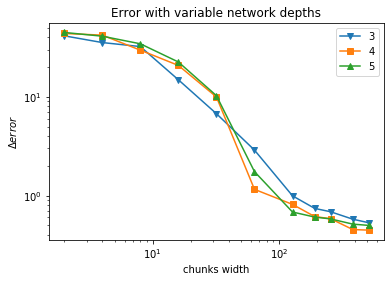

In [3]:
fig = plt.figure()
ax = plt.gca()
#ax.plot(x_array,y_arrays[0],marker="o",label="2")
ax.plot(x_arrays[0],y_arrays[0],marker="v",label="3")
ax.plot(x_arrays[1],y_arrays[1],marker="s",label="4")
ax.plot(x_arrays[2],y_arrays[2],marker="^",label="5")
ax.set_title('Error with variable network depths')
ax.set_yscale('log')
ax.set_xscale('log')
ax.legend()
plt.xlabel('chunks width')
plt.ylabel('$\Delta error$')

## Plot the error for 2 layer NN, with variable weight decay

In [10]:
depth=2
W=2048
input_dim=40

wds=[1e-2,1e-3,1e-4,1e-5,1e-6]
x_arrays=[]
y_arrays=[]
for i in range(len(wds)):
    x_arrays.append(np.load(f'./arrays/sizes_{depth}_layer_{W}_inputdim_{input_dim}_wd_{wds[i]}.npy'))
    y_arrays.append(np.load(f'./arrays/error_{depth}_layer_{W}_inputdim_{input_dim}_wd_{wds[i]}.npy'))


Text(0, 0.5, '$\\Delta error$')

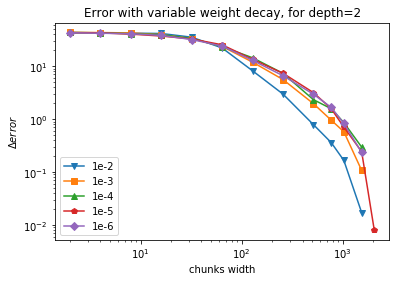

In [11]:
fig = plt.figure()
ax = plt.gca()
ax.plot(x_arrays[0],y_arrays[0],marker="v",label="1e-2")
ax.plot(x_arrays[1],y_arrays[1],marker="s",label="1e-3")
ax.plot(x_arrays[2],y_arrays[2],marker="^",label="1e-4")
ax.plot(x_arrays[3],y_arrays[3],marker="p",label="1e-5")
ax.plot(x_arrays[4],y_arrays[4],marker="D",label="1e-6")
ax.set_title('Error with variable weight decay, for depth=2')
ax.set_yscale('log')
ax.set_xscale('log')
ax.legend()
plt.xlabel('chunks width')
plt.ylabel('$\Delta error$')

## Plot for variable width, for FCN3

In [3]:
depth=3
input_dim=784
lr=1e-3
Ws=[128,256,512,1024,2048]
x_arrays=[]
y_arrays=[]
for i in range(len(Ws)):
    x_arrays.append(np.load(f'./arrays/sizes_{depth}_layer_{Ws[i]}_inputdim_{input_dim}_lr_{lr}_wd_{1e-4}.npy'))
    y_arrays.append(np.load(f'./arrays/error_{depth}_layer_{Ws[i]}_inputdim_{input_dim}_lr_{lr}_wd_{1e-4}.npy'))

Text(0, 0.5, '$\\Delta error$')

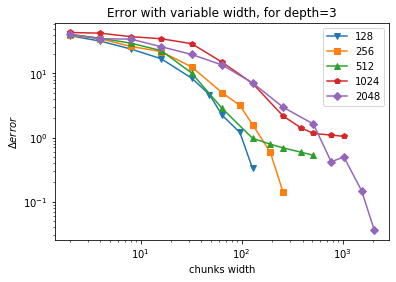

In [4]:
fig = plt.figure()
ax = plt.gca()
ax.plot(x_arrays[0],y_arrays[0],marker="v",label="128")
ax.plot(x_arrays[1],y_arrays[1],marker="s",label="256")
ax.plot(x_arrays[2],y_arrays[2],marker="^",label="512")
ax.plot(x_arrays[3],y_arrays[3],marker="p",label="1024")
ax.plot(x_arrays[4],y_arrays[4],marker="D",label="2048")

ax.set_title('Error with variable width, for depth=3')
ax.set_yscale('log')
ax.set_xscale('log')
ax.legend()
plt.xlabel('chunks width')
plt.ylabel('$\Delta error$')

## Testing XOR

In [4]:
depth=3
weight_decays=[5e-5,1e-4,5e-4,1e-3,5e-3]
input_dim=20
signal_noise_ratio=1.
lr=1e-2
widths=[16,32,64,128,256]
dataset='XOR'
y_arrays=[]
for element in weight_decays:
    y_array=[]
    for W in widths:
        if dataset=='XOR':
            y_array.append(float(np.load(f'./deltaerrors/ensemble_deltaerror_{dataset}_{depth}_layer_{W}_inputdim_{input_dim}_lr_{lr}_wd_{element}_ratio_{signal_noise_ratio}.npy')))
        if dataset=='pMNIST':
            y_array.append(float(np.load(f'./deltaerrors/ensemble_deltaerror_{dataset}_{depth}_layer_{W}_inputdim_{input_dim}_lr_{lr}_wd_{element}.npy')))

    y_arrays.append(y_array)
#y_arrays=-np.array(y_arrays)


Text(0, 0.5, '$\\Delta error$')

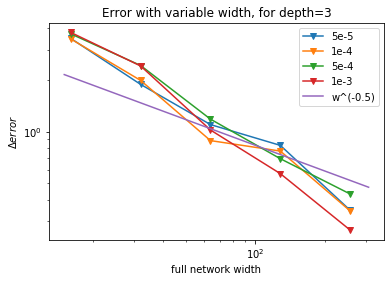

In [5]:
fig = plt.figure()
ax = plt.gca()
ax.plot(widths,y_arrays[0],marker="v",label="5e-5")
ax.plot(widths,y_arrays[1],marker="v",label="1e-4")
ax.plot(widths,y_arrays[2],marker="v",label="5e-4")
ax.plot(widths,y_arrays[3],marker="v",label="1e-3")
#ax.plot(widths,y_arrays[4],marker="v",label="5e-3")
#ax.plot(widths,y_arrays[5],marker="v",label="1e-2")

x = np.linspace(widths[0]-1,1.2*W,1000)
a=y_arrays[2][-1]/(widths[-1]**(-0.5))
y=1.2*a*x**(-0.5)
ax.plot(x,y,label='w^(-0.5)')

ax.set_title(f'Error with variable width, for depth={depth}')
ax.set_yscale('log')
ax.set_xscale('log')
ax.legend()
plt.xlabel('full network width')
plt.ylabel('$\Delta error$')